## Natural Language Processing Assignment-SMS Spam Collection
### Name: Falguni Gaikwad
### Rollno: J077
 

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> all
       | 
       | Downloading package abc to /root/nltk_data...
       |   Unzipping corpora/abc.zip.
       | Downloading package alpino to /root/nltk_data...
       |   Unzipping corpora/alpino.zip.
       | Downloading package averaged_perceptron_tagger to
       |     /root/nltk_data...
       |   Unzipping taggers/averaged_perceptron_tagger.zip.
       | Downloading package averaged_perceptron_tagger_ru to
       |     /root/nltk_data...
       |   Unzipping taggers/averaged_perceptron_tagger_ru.zip.
       | Downloading package basque_grammars to /root/nltk_data...
       |   Unzipping grammars/basque_grammars.zip.
       | Downloading package biocreative_ppi to /root/n

True

In [3]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Dataset

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import numpy as np
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/spam.csv',encoding='ISO-8859-1')
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


### Spam and Ham Count

In [6]:
data['v1'].value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

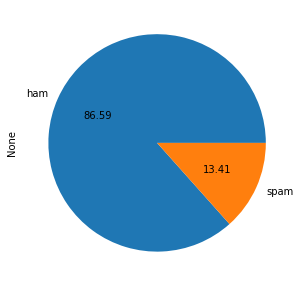

In [7]:
data.groupby('v1').size().plot(kind='pie', autopct='%.2f',figsize=(5,5))

### Data Preprocessing/ Data Cleaning

In [8]:
#Importing libraries
from nltk.corpus import stopwords
from string import punctuation
from nltk.tokenize import word_tokenize
from nltk.stem import LancasterStemmer

In [9]:
stuff_to_be_removed = list(stopwords.words('english'))+list(punctuation)
final_corpus = []
stemmer = LancasterStemmer()

for i in range(len(data)):
    word = word_tokenize(data['v2'][i].lower())
    word = [stemmer.stem(y) for y in word if y not in stuff_to_be_removed]
    j = " ".join(word)
    final_corpus.append(j)

TF-IDF Vectorizer

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
vector = tfidf.fit_transform(final_corpus)
print(type(vector))
X = vector.toarray()
y=data['v1']

<class 'scipy.sparse.csr.csr_matrix'>


In [11]:
#Splitting data into Training, Testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Word Cloud

In [13]:
from wordcloud import WordCloud, STOPWORDS

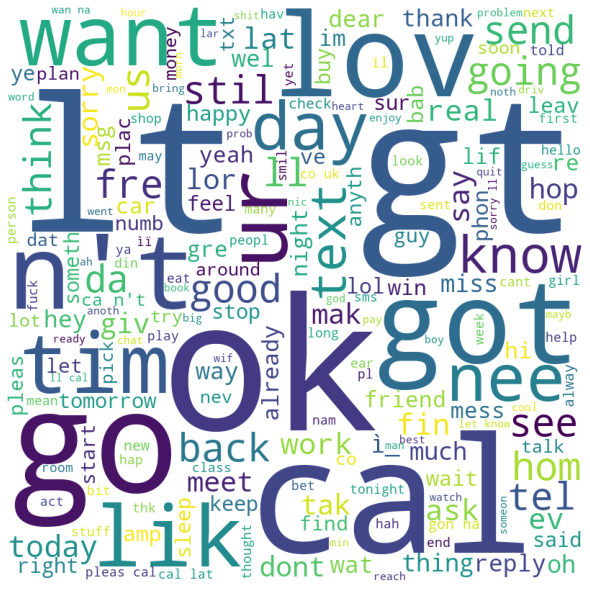

In [17]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)

comment_words = ""
for val in final_corpus:
    val = str(val)
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
        
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,background_color ='white',stopwords = stopwords,min_font_size = 10).generate(comment_words)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

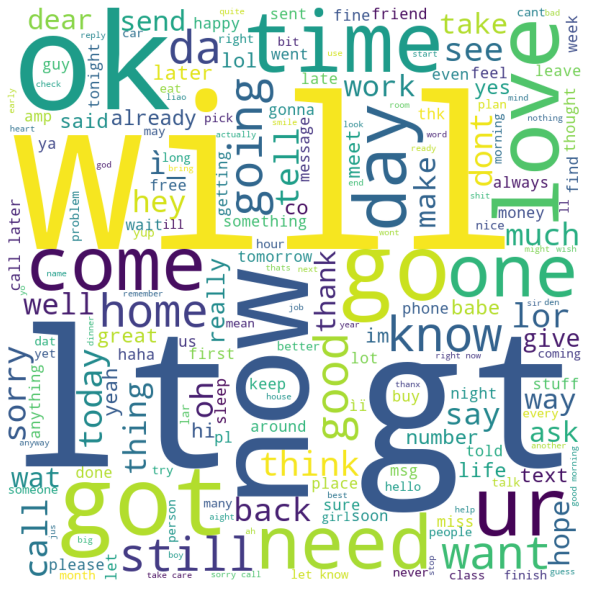

In [18]:
#Ham messages

h = data[data['v1'] == 'ham']
ham_words = ""
for val in h.v2:     
    val = str(val)
    tokens = val.split()     
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    ham_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stopwords, min_font_size = 10).generate(ham_words)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

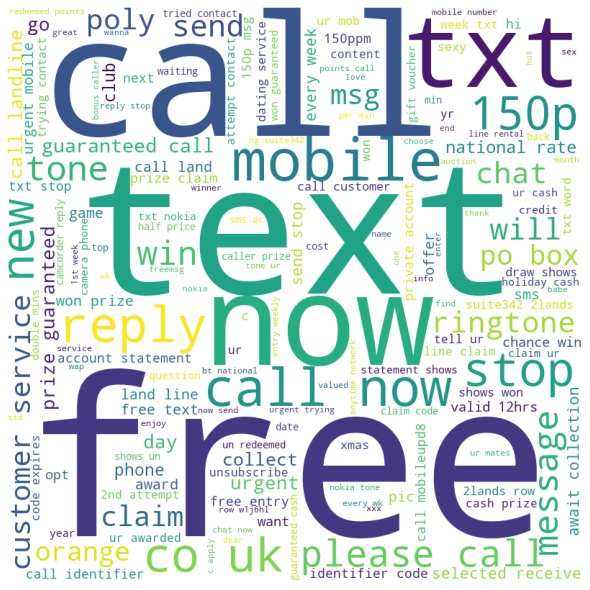

In [19]:
#Spam Messages

s = data[data['v1'] == 'spam']
spam_words = ""
for val in s.v2:     
    val = str(val)
    tokens = val.split()     
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    spam_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stopwords, min_font_size = 10).generate(spam_words)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

### Testing Models

In [20]:
#Importing all models
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

In [21]:
models=[]
models.append(('Support Vector Machine',SVC(gamma='auto')))
models.append(('Logistic Regression',LogisticRegression()))
models.append(('XG Boosting',XGBClassifier()))
models.append(('Decision Tree',DecisionTreeClassifier()))
models.append(('Naive Bayes',GaussianNB()))
models.append(('Random Forest',RandomForestClassifier()))
models.append(('Adaboost',AdaBoostClassifier()))
models.append(('K-NN',KNeighborsClassifier()))

In [22]:
from sklearn.model_selection import cross_val_score,KFold
from sklearn.metrics import classification_report

for name,model in models:
    print(name)
    model.fit(X_train,y_train)
    predict=model.predict(X_test)
    print(classification_report(predict,y_test))
    print('---------------------------------------------------------------------')

Support Vector Machine
              precision    recall  f1-score   support

         ham       1.00      0.86      0.93      1839
        spam       0.00      0.00      0.00         0

    accuracy                           0.86      1839
   macro avg       0.50      0.43      0.46      1839
weighted avg       1.00      0.86      0.93      1839

---------------------------------------------------------------------
Logistic Regression
              precision    recall  f1-score   support

         ham       0.99      0.94      0.97      1676
        spam       0.62      0.95      0.75       163

    accuracy                           0.94      1839
   macro avg       0.81      0.95      0.86      1839
weighted avg       0.96      0.94      0.95      1839

---------------------------------------------------------------------
XG Boosting
              precision    recall  f1-score   support

         ham       1.00      0.97      0.98      1631
        spam       0.81      0.99      0.8

### Random Forest is the best model with Precision: 100%, Recall: 98% ,Accuracy: 99%